In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = r"C:\Users\rithi\Downloads\city_day.csv"
df = pd.read_csv(file_path)


In [3]:
df.drop(labels=["City", "Date"], axis=1, inplace=True)


In [4]:
df = df.dropna().reset_index(drop=True)


In [5]:
encoder = LabelEncoder()
df["AQI_Bucket"] = encoder.fit_transform(df["AQI_Bucket"])


In [6]:
with open("models/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)


In [7]:
X = df.drop(columns=["AQI", "AQI_Bucket"])

In [8]:

y_class = df["AQI_Bucket"]  # Target for classification (AQI bucket)
y_reg = df["AQI"]  # Target for regression (if needed later)



In [9]:
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)


In [10]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train_reg)

RandomForestRegressor(random_state=42)

In [13]:
# Predict AQI values on test set
y_pred_reg = rf_regressor.predict(X_test)


In [14]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Random Forest Regressor MAE: {mae:.2f}")


Random Forest Regressor MAE: 13.86


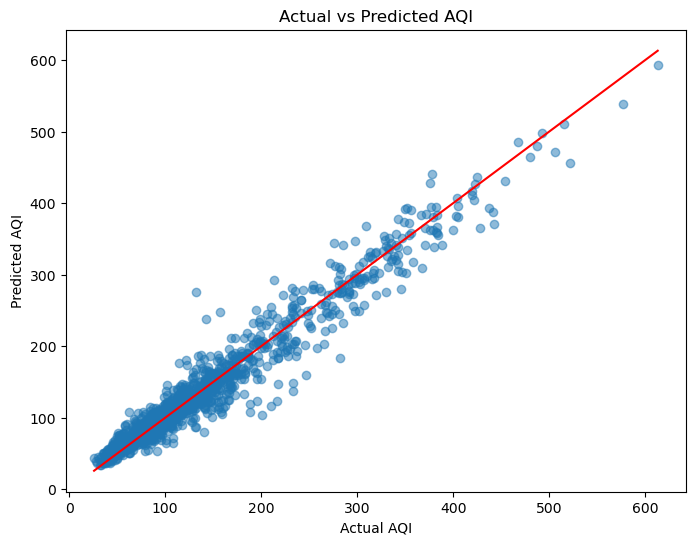

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r')  # Ideal fit line
plt.show()


In [16]:
# Train the **Random Forest Classifier**
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_class)

RandomForestClassifier(random_state=42)

In [17]:
# Predict AQI categories using the predicted AQI values
predicted_classes = rf_classifier.predict(X_test)


In [18]:
# Evaluate classification performance
accuracy = accuracy_score(y_test_class, predicted_classes)
print(f"Random Forest Classifier Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test_class, predicted_classes, target_names=encoder.classes_))



Random Forest Classifier Accuracy: 81.97%
              precision    recall  f1-score   support

        Good       0.88      0.69      0.77        94
    Moderate       0.85      0.86      0.86       509
        Poor       0.70      0.63      0.66       132
Satisfactory       0.82      0.87      0.85       411
      Severe       0.87      0.57      0.68        23
   Very Poor       0.73      0.82      0.77        79

    accuracy                           0.82      1248
   macro avg       0.81      0.74      0.77      1248
weighted avg       0.82      0.82      0.82      1248



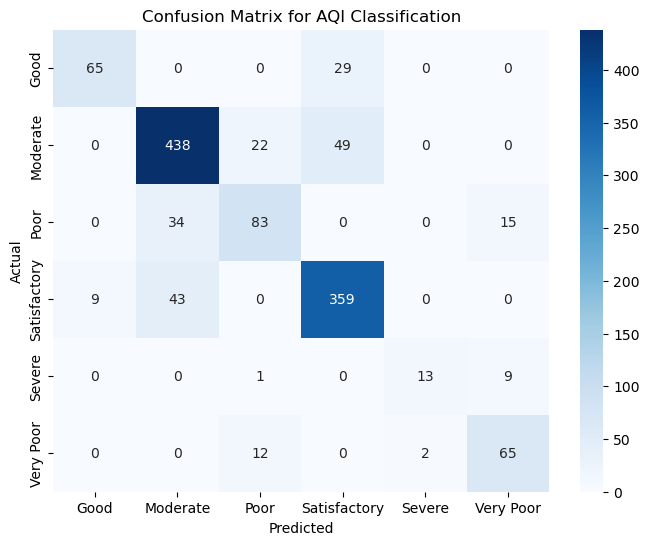

In [19]:
# Confusion Matrix for classification
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, predicted_classes), annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix for AQI Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
# Save both models
os.makedirs("models", exist_ok=True)

with open("models/RandomForest_regressor.pkl", "wb") as file:
    pickle.dump(rf_regressor, file)

with open("models/RandomForest_classifier.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)

print("Models saved successfully!")

Models saved successfully!


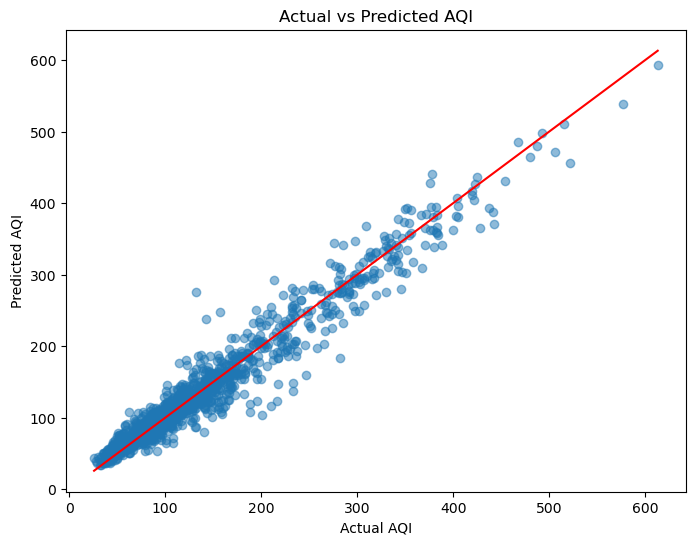

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r')  # Ideal fit line
plt.show()
